In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# cwd
print(f'Current working directory: {os.getcwd()}')
# change directory
os.chdir('../')
print(f'New working directory: {os.getcwd()}')

/var/folders/83/j83q5_mj11956_7k9tnld0ym0000gn/T/ipykernel_52118/3914640498.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Current working directory: /Users/gbemidebe/Documents/GitHub/CDImodeling/notebooks
New working directory: /Users/gbemidebe/Documents/GitHub/CDImodeling


In [2]:
from cdi.plotters import Plotters

plotter = Plotters()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


SA --> surface area 
DG --> defect ratio
%N --> percent nitrogen
%O --> percent oxygen
%S --> percent sulphur
CD --> current density
CONC --> concentration of electrolyte
CAP --> specific capacitance

In [3]:
import pandas as pd

desired_columns = ['SA', 'DG', '%N', '%O', '%S', 'CD', 'CONC', 'CAP']

data = pd.read_csv('data/specific_capacitance_data.csv')
data = data[desired_columns]
print(data.shape)
data.head()

(620, 8)


,SA,DG,%N,%O,%S,CD,CONC,CAP
0,1122.5,0.85,NaN,5.7,NaN,0.5,6.0,240.63
1,1122.5,0.85,NaN,5.7,NaN,1.0,6.0,228.13
2,1122.5,0.85,NaN,5.7,NaN,2.0,6.0,225.00
3,1122.5,0.85,NaN,5.7,NaN,5.0,6.0,215.63
4,1122.5,0.85,NaN,5.7,NaN,10.0,6.0,206.25


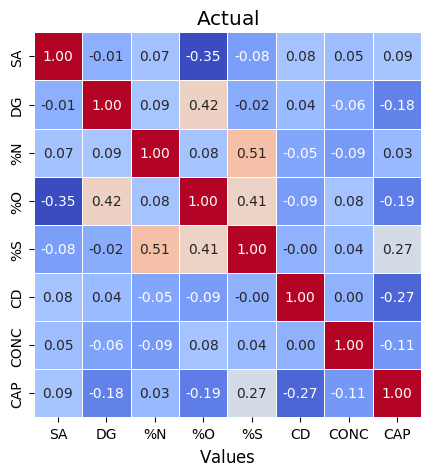

In [4]:
plotter.plot_heat_map(data=data, label = r'$ \rm Actual$', property = 'original',
                    fig_size = (5, 5), save_fig = False)

In [5]:
# drop missing values
clean_data = data.dropna()
print(clean_data.shape)
clean_data.head()

(159, 8)


,SA,DG,%N,%O,%S,CD,CONC,CAP
152,308.8,1.01,1.46,11.94,1.14,0.5,6.0,378.0
153,308.8,1.01,1.46,11.94,1.14,1.0,6.0,352.0
154,308.8,1.01,1.46,11.94,1.14,2.0,6.0,325.0
155,308.8,1.01,1.46,11.94,1.14,5.0,6.0,308.0
156,308.8,1.01,1.46,11.94,1.14,10.0,6.0,292.0


## 3. Imputation

In [6]:
import pandas as pd
import numpy as np
from loguru import logger
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer

from cdi.dataPreprocessing import Imputation

In [7]:
# fill data
method = 'ExtraTreesRegressor'
model = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=20),
                                 random_state=0,
                                 max_iter=200)
# method = 'KNN'
# model = KNNImputer(n_neighbors=5, weights="uniform")

IMPUTER = Imputation(data=data, columns=desired_columns, model=model, method=method)

df_imputed = IMPUTER.impute_data(split_data=False)


2024-02-04 21:54:17.809 | INFO     | cdi.dataPreprocessing:impute:100 - Database path:        SA    DG  %N   %O  %S    CD  CONC     CAP
0  1122.5  0.85 NaN  5.7 NaN   0.5   6.0  240.63
1  1122.5  0.85 NaN  5.7 NaN   1.0   6.0  228.13
2  1122.5  0.85 NaN  5.7 NaN   2.0   6.0  225.00
3  1122.5  0.85 NaN  5.7 NaN   5.0   6.0  215.63
4  1122.5  0.85 NaN  5.7 NaN  10.0   6.0  206.25
2024-02-04 21:54:17.809 | INFO     | cdi.dataPreprocessing:impute:101 - ML method: ExtraTreesRegressor

2024-02-04 21:54:17.810 | INFO     | cdi.dataPreprocessing:impute:103 - Number of data points: 620
2024-02-04 21:54:17.810 | WARNING  | cdi.dataPreprocessing:impute:106 - Number of missing values in "SA": 0
2024-02-04 21:54:17.811 | WARNING  | cdi.dataPreprocessing:impute:106 - Number of missing values in "DG": 79
2024-02-04 21:54:17.811 | WARNING  | cdi.dataPreprocessing:impute:106 - Number of missing values in "%N": 218
2024-02-04 21:54:17.811 | WARNING  | cdi.dataPreprocessing:impute:106 - Number of missing

In [8]:
imputed_data = df_imputed.drop(clean_data.index)
print(imputed_data.shape)
imputed_data.head()

(461, 8)


,SA,DG,%N,%O,%S,CD,CONC,CAP
0,1122.5,0.85,1.7200,5.7,0.7135,0.5,6.0,240.63
1,1122.5,0.85,2.4790,5.7,1.3185,1.0,6.0,228.13
2,1122.5,0.85,2.3895,5.7,1.2590,2.0,6.0,225.00
3,1122.5,0.85,2.5950,5.7,1.2850,5.0,6.0,215.63
4,1122.5,0.85,3.1220,5.7,1.8225,10.0,6.0,206.25


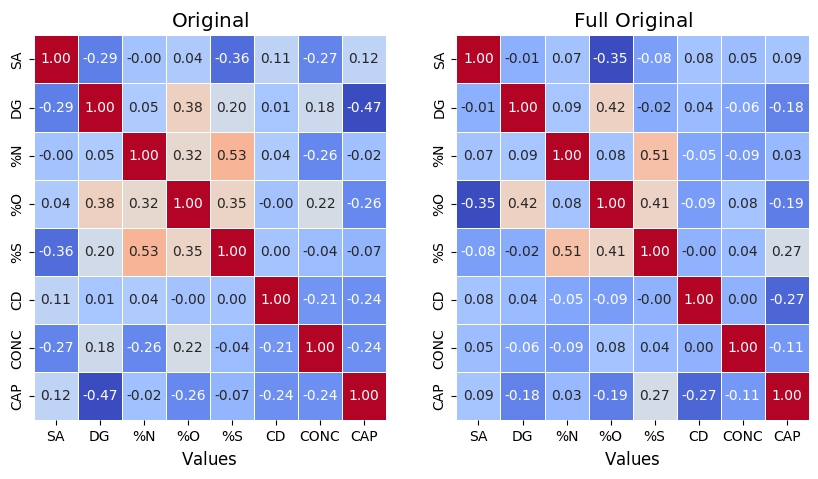

In [9]:
plotter.plot_heat_2map(clean_data, r'$ \rm Original$',
                    data, r'$ \rm Full \ Original$', 
                    property = 'clean_full_original_vs_synthetic',
                    fig_size = (10, 5), save_fig = False)

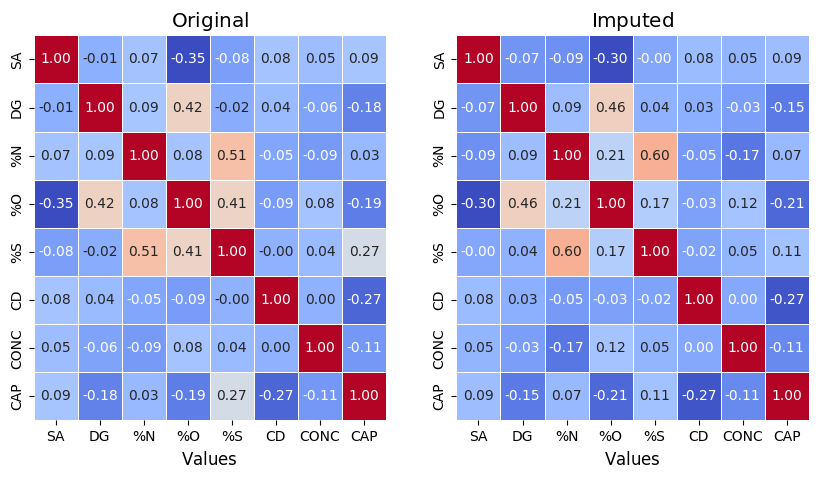

In [10]:
plotter.plot_heat_2map(data, r'$ \rm Original$',
                    df_imputed, r'$ \rm Imputed$', 
                    property = 'full_original_vs_synthetic',
                    fig_size = (10, 5), save_fig = False)

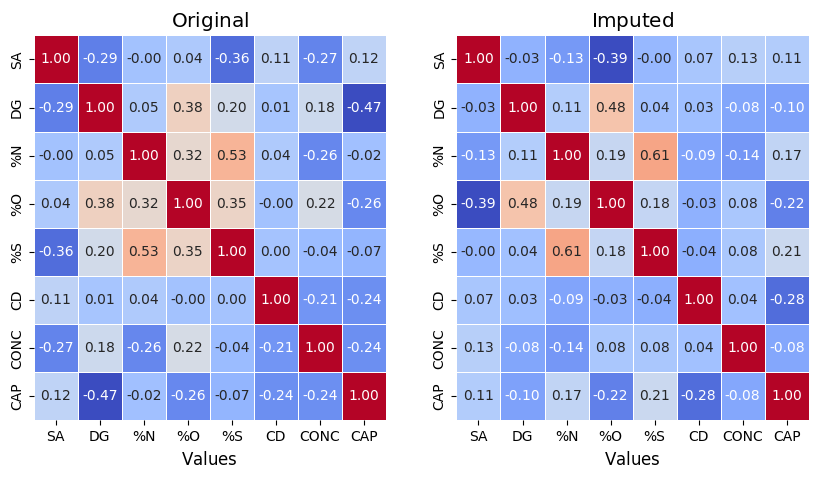

In [11]:
plotter.plot_heat_2map(clean_data, r'$ \rm Original$',
                    imputed_data, r'$ \rm Imputed$', 
                    property = 'cleaned_original_vs_synthetic',
                    fig_size = (10, 5), save_fig = False)

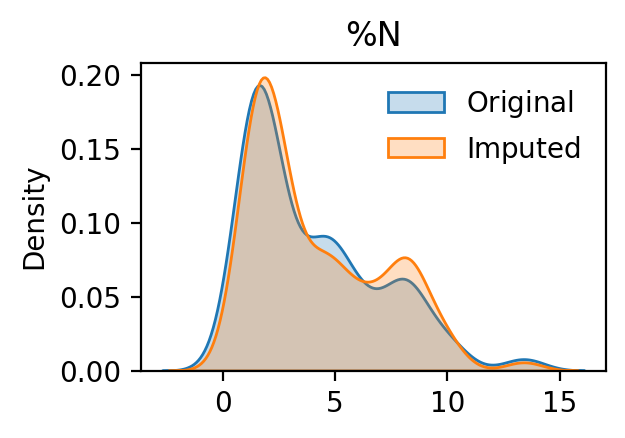

In [12]:
# plot the KDE of the data
idx = np.random.choice(data.columns)

plotter.plot_kde(
                data = [data[idx].values, df_imputed[idx].values],
                labels = [r'$ \rm Original$', r'$ \rm Imputed$'],
                colors = ['C10', 'C1'],
                property = idx,
                fig_size=(3, 2))

# ML model

### Source Model

In [13]:
from cdi.dataPreprocessing import Data

In [14]:
imputed_data.head()

,SA,DG,%N,%O,%S,CD,CONC,CAP
0,1122.5,0.85,1.7200,5.7,0.7135,0.5,6.0,240.63
1,1122.5,0.85,2.4790,5.7,1.3185,1.0,6.0,228.13
2,1122.5,0.85,2.3895,5.7,1.2590,2.0,6.0,225.00
3,1122.5,0.85,2.5950,5.7,1.2850,5.0,6.0,215.63
4,1122.5,0.85,3.1220,5.7,1.8225,10.0,6.0,206.25


In [16]:
random_seed_source = 42 #np.random.randint(0, 1000)
test_size = 0.15
val_size = 0.05
logger.info(f'Random seed: {random_seed_source}')
DataProcess = Data(data=imputed_data, target_column='CAP', 
                   test_size=test_size, val_size=val_size, random_seed=random_seed_source,
                   scaler_name='ETR_imputed_specific_capacitance')
X_train, X_test, X_val, y_train, y_test, y_val = DataProcess.preprocess()

2024-02-04 21:56:44.820 | INFO     | __main__:<module>:4 - Random seed: 42
2024-02-04 21:56:44.824 | INFO     | cdi.dataPreprocessing:preprocess:37 - mean of Y: 194.58123644251626
2024-02-04 21:56:44.825 | INFO     | cdi.dataPreprocessing:preprocess:39 - Initiated Standardizing data
2024-02-04 21:56:44.829 | SUCCESS  | cdi.dataPreprocessing:preprocess:51 - Standardizing completed
2024-02-04 21:56:44.829 | INFO     | cdi.dataPreprocessing:preprocess:54 - Initiated train-test split for model evaluation and validation
2024-02-04 21:56:44.831 | SUCCESS  | cdi.dataPreprocessing:preprocess:59 - Train: ((368, 7), (368,)) --> 79.83%
2024-02-04 21:56:44.831 | SUCCESS  | cdi.dataPreprocessing:preprocess:60 - Val: ((70, 7), (70,)) --> 15.18%
2024-02-04 21:56:44.831 | SUCCESS  | cdi.dataPreprocessing:preprocess:61 - Test: ((23, 7), (23,)) --> 4.99%
2024-02-04 21:56:44.831 | SUCCESS  | cdi.dataPreprocessing:preprocess:63 - train-test split completed


In [17]:
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(368, 7) (23, 7) (70, 7) (368,) (23,) (70,)


In [18]:
# Import Libraries
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
from tensorflow import keras
from datetime import datetime

# https://github.com/keras-team/keras/issues/7947
from keras import backend as K
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

# root mean squared error (rmse) for regression
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

class BaseModel(HyperModel):

    def __init__(self):
        pass

    def build(self, hp):
        
        # Specify model
        model = keras.Sequential()

        # Range of models to build
        for i in range(hp.Int('num_layers', 1, 10)):

            model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                min_value=1,
                                                max_value=50, 
                                                step=1),
                                   activation='relu'))
        
        # Output layer
        model.add(keras.layers.Dense(1, activation='linear'))
        
        # Compile the constructed model and return it
        model.compile(
            optimizer=tensorflow.keras.optimizers.legacy.Adam(
                hp.Choice('learning_rate',
                          values=[1e-2, 1e-3, 1e-4, 1e-5])),
                          loss="mean_squared_error", metrics=["mean_squared_error", rmse, r_square])
        return model

`import kerastuner` is deprecated, please use `import keras_tuner`.


In [19]:
# Construct the Hyperband tuner using the hypermodel class created
hypermodel = BaseModel()  
# BayesianOptimization  tuner
BayesianTuner = BayesianOptimization(hypermodel, objective='val_loss', max_trials=100, seed=1994, project_name=f'{datetime.now().strftime("%Y-%m-%d")}_specific_capacitance_BayesOpt')
# early stopping
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
# Search for the best parameters
BayesianTuner.search(X_train, y_train,
             epochs=100, callbacks=[earlystopping],
             validation_data=(X_val, y_val))
# Get the best hyperparameters from the search
params = BayesianTuner.get_best_hyperparameters()[0]
# Build the model using the best hyperparameters
SourceModel = BayesianTuner.hypermodel.build(params)
# Train the best fitting model
# merge X_train and X_test, y_train and y_test
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)
SourceModel.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), callbacks=[earlystopping])

Trial 100 Complete [00h 00m 03s]
val_loss: 3059.819091796875

Best val_loss So Far: 1513.051513671875
Total elapsed time: 00h 06m 30s


Epoch 1/1000
12/12 [==============================] - 0s 9ms/step - loss: 33371.5703 - mean_squared_error: 33371.5703 - rmse: 162.8360 - r_square: -5.2382 - val_loss: 21632.0859 - val_mean_squared_error: 21632.0859 - val_rmse: 131.8784 - val_r_square: -4.5704
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: 12968.5068 - mean_squared_error: 12968.5068 - rmse: 90.9232 - r_square: -1.5048 - val_loss: 5849.8091 - val_mean_squared_error: 5849.8091 - val_rmse: 57.0564 - val_r_square: -0.2277
Epoch 3/1000
12/12 [==============================] - 0s 2ms/step - loss: 7360.9033 - mean_squared_error: 7360.9033 - rmse: 66.5870 - r_square: -0.4452 - val_loss: 6990.5649 - val_mean_squared_error: 6990.5649 - val_rmse: 64.9046 - val_r_square: -0.3665
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 6111.0000 - mean_squared_error: 6111.0000 - rmse: 59.5313 - r_square: -0.2303 - val_loss: 5022.1973 - val_mean_squared_error: 5022.1973 - val_rmse: 53.9861 

In [239]:
# save params
params_dict = params.values
params_dict

{'num_layers': 10,
 'units_0': 21,
 'learning_rate': 0.01,
 'units_1': 38,
 'units_2': 9,
 'units_3': 35,
 'units_4': 21,
 'units_5': 45,
 'units_6': 50,
 'units_7': 14,
 'units_8': 50,
 'units_9': 10}

In [238]:
params

In [20]:
SourceModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 21)                168       
                                                                 
 dense_6 (Dense)             (None, 38)                836       
                                                                 
 dense_7 (Dense)             (None, 9)                 351       
                                                                 
 dense_8 (Dense)             (None, 35)                350       
                                                                 
 dense_9 (Dense)             (None, 21)                756       
                                                                 
 dense_10 (Dense)            (None, 45)                990       
                                                                 
 dense_11 (Dense)            (None, 50)               

In [21]:
history_source_model = pd.DataFrame(SourceModel.history.history)

history_source_model.head()

,loss,mean_squared_error,rmse,r_square,val_loss,val_mean_squared_error,val_rmse,val_r_square
0,33371.570312,33371.570312,162.835983,-5.238156,21632.085938,21632.085938,131.878357,-4.570390
1,12968.506836,12968.506836,90.923225,-1.504788,5849.809082,5849.809082,57.056416,-0.227718
2,7360.903320,7360.903320,66.586960,-0.445195,6990.564941,6990.564941,64.904640,-0.366474
3,6111.000000,6111.000000,59.531265,-0.230258,5022.197266,5022.197266,53.986122,-0.123006
4,5907.597168,5907.597168,58.956974,-0.131966,4942.367188,4942.367188,54.955605,-0.159737


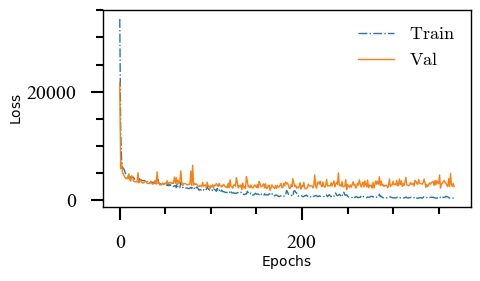

In [22]:
plotter.plot_loss(history_source_model['loss'], history_source_model['val_loss'], save_fig=False)

1/1 [==============================] - 0s 8ms/step


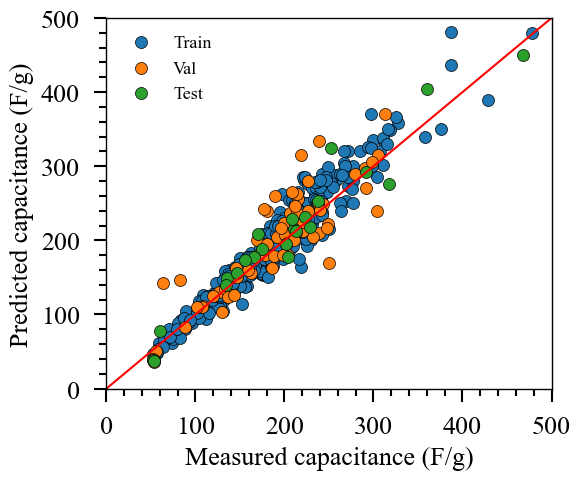

<Figure size 640x480 with 0 Axes>

In [23]:
train_predictions = SourceModel.predict(X_train).flatten()
val_predictions = SourceModel.predict(X_val).flatten()
test_predictions = SourceModel.predict(X_test).flatten()

plotter.plot_model_eval(
            predictions={'train': train_predictions, 'test': test_predictions, 'val': val_predictions},
                        labels={'train': y_train, 'test': y_test, 'val': y_val}, 
                        llimit=0, ulimit=500, fig_size=(6, 5),
                        name='model_eval', 
                        x_label='Measured capacitance (F/g)', 
                        y_label='Predicted capacitance (F/g)')

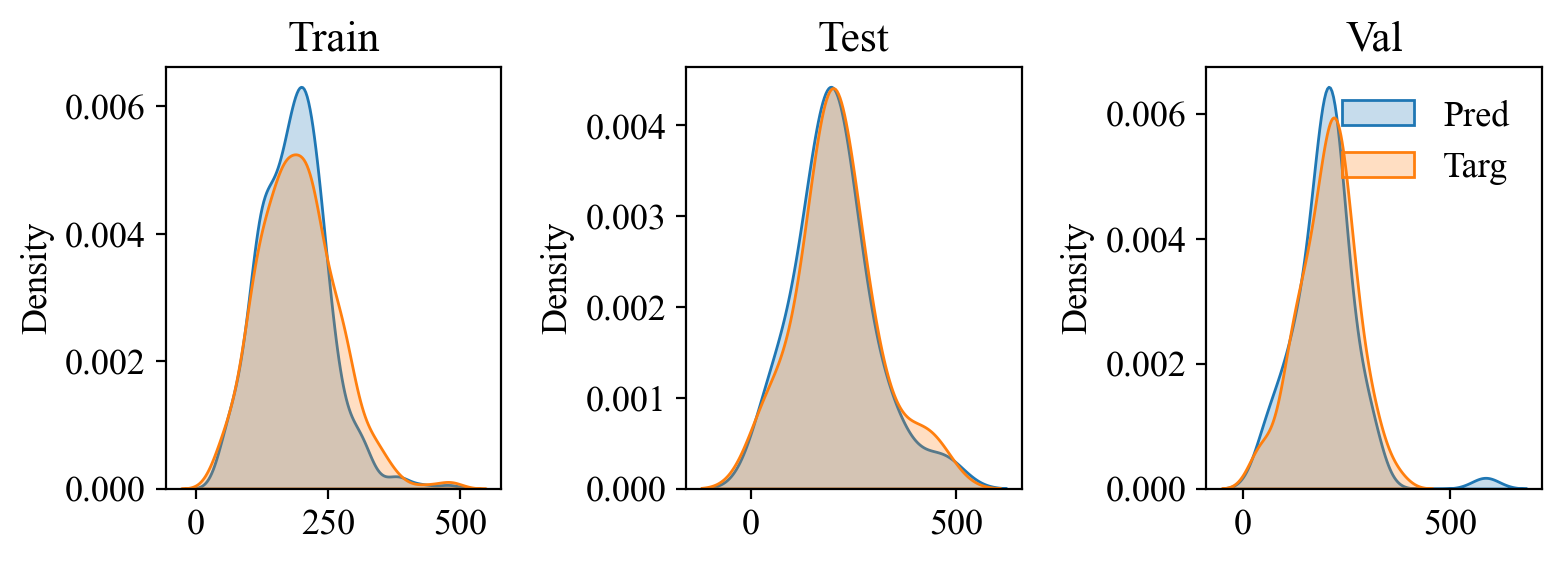

In [24]:
plotter.plot_pred_distribution(fig_size=(8, 3))

In [25]:
# accuracy
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Training set')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train, train_predictions)):0.2f}, R^2: {r2_score(y_train, train_predictions):0.2f}, MAE: {mean_absolute_error(y_train, train_predictions):0.2f}')
print('Validation set')
print(f'RMSE: {np.sqrt(mean_squared_error(y_val, val_predictions)):0.2f}, R^2: {r2_score(y_val, val_predictions):0.2f}, MAE: {mean_absolute_error(y_val, val_predictions):0.2f}')
print('Test set')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, test_predictions)):0.2f}, R^2: {r2_score(y_test, test_predictions):0.2f}, MAE: {mean_absolute_error(y_test, test_predictions):0.2f}')

Training set
RMSE: 20.98, R^2: 0.92, MAE: 15.40
Validation set
RMSE: 50.47, R^2: 0.45, MAE: 27.96
Test set
RMSE: 24.71, R^2: 0.93, MAE: 18.52


In [26]:
SourceModel.save_weights(f'./models/specific_capacitance_source_model_ETR_imputation_approach.h5')

In [27]:
SourceModel.get_weights()

[array([[ 0.00614567,  0.94056654,  0.78485775, -0.23601975, -0.07467222,
          0.01504361, -0.07277093, -0.08498039, -0.7690328 ,  0.19860372,
         -0.50024545, -0.19069862, -1.5201772 , -1.1728888 , -0.2813979 ,
         -0.06704755, -0.06268024,  1.0469097 , -0.24857229,  1.0136294 ,
         -0.7481566 ],
        [ 1.3915122 , -0.0325815 ,  0.27307984, -0.54613334, -0.3847814 ,
         -0.49460766, -0.5469884 ,  0.54082394, -0.10205604, -0.60996544,
         -0.07988521,  0.1797487 ,  0.5482936 , -1.1675626 ,  0.03482786,
          1.4365301 , -0.4524534 , -0.7239684 , -0.02529435, -0.36043474,
          0.53359556],
        [-0.31176183,  0.884926  , -1.5910325 , -0.48061833, -0.37875152,
          0.3291306 , -1.7114137 ,  0.962459  , -0.46619362,  0.6611709 ,
          0.2539949 , -0.5237494 ,  0.36680412,  1.2803556 , -0.18813226,
          0.02584554, -0.16052687,  0.6889784 , -0.33722067,  0.4031473 ,
         -0.03988681],
        [-0.5240264 , -0.50415343, -0.64329

### Transfer Learning

In [192]:
from tensorflow.keras.models import clone_model

In [223]:
# Create a new model for transfer learning
from tensorflow.keras.models import clone_model
TargetModel = clone_model(SourceModel)
# Restore the weights
TargetModel.load_weights('./models/specific_capacitance_source_model_ETR_imputation_approach.h5')
TargetModel.get_weights()

[array([[ 0.00614567,  0.94056654,  0.78485775, -0.23601975, -0.07467222,
          0.01504361, -0.07277093, -0.08498039, -0.7690328 ,  0.19860372,
         -0.50024545, -0.19069862, -1.5201772 , -1.1728888 , -0.2813979 ,
         -0.06704755, -0.06268024,  1.0469097 , -0.24857229,  1.0136294 ,
         -0.7481566 ],
        [ 1.3915122 , -0.0325815 ,  0.27307984, -0.54613334, -0.3847814 ,
         -0.49460766, -0.5469884 ,  0.54082394, -0.10205604, -0.60996544,
         -0.07988521,  0.1797487 ,  0.5482936 , -1.1675626 ,  0.03482786,
          1.4365301 , -0.4524534 , -0.7239684 , -0.02529435, -0.36043474,
          0.53359556],
        [-0.31176183,  0.884926  , -1.5910325 , -0.48061833, -0.37875152,
          0.3291306 , -1.7114137 ,  0.962459  , -0.46619362,  0.6611709 ,
          0.2539949 , -0.5237494 ,  0.36680412,  1.2803556 , -0.18813226,
          0.02584554, -0.16052687,  0.6889784 , -0.33722067,  0.4031473 ,
         -0.03988681],
        [-0.5240264 , -0.50415343, -0.64329

In [224]:
# new data from the same distribution but not imputed
random_seed_target = 612 # np.random.randint(0, 1000)
logger.info(f'Random seed: {random_seed_target}')
DataProcess_transfer = Data(data=clean_data, target_column='CAP', 
                   test_size=0.20, val_size=0.10, random_seed=random_seed_target,
                   scaler_name='actual_specific_capacitance')
X_train_transfer, X_test_transfer, X_val_transfer, y_train_transfer, y_test_transfer, y_val_transfer = DataProcess_transfer.preprocess() #load_scaler=True, scaler_path=f'{datetime.now().strftime("%Y-%m-%d")}_ETR_imputed_specific_capacitance_scaler_seed{random_seed_source}_train_size{100-test_size*100-val_size*100}percent.pkl')

2024-02-04 22:17:14.663 | INFO     | __main__:<module>:3 - Random seed: 612
2024-02-04 22:17:14.666 | INFO     | cdi.dataPreprocessing:preprocess:37 - mean of Y: 234.21132075471698
2024-02-04 22:17:14.667 | INFO     | cdi.dataPreprocessing:preprocess:39 - Initiated Standardizing data
2024-02-04 22:17:14.671 | SUCCESS  | cdi.dataPreprocessing:preprocess:51 - Standardizing completed
2024-02-04 22:17:14.671 | INFO     | cdi.dataPreprocessing:preprocess:54 - Initiated train-test split for model evaluation and validation
2024-02-04 22:17:14.674 | SUCCESS  | cdi.dataPreprocessing:preprocess:59 - Train: ((111, 7), (111,)) --> 69.81%
2024-02-04 22:17:14.675 | SUCCESS  | cdi.dataPreprocessing:preprocess:60 - Val: ((32, 7), (32,)) --> 20.13%
2024-02-04 22:17:14.677 | SUCCESS  | cdi.dataPreprocessing:preprocess:61 - Test: ((16, 7), (16,)) --> 10.06%
2024-02-04 22:17:14.680 | SUCCESS  | cdi.dataPreprocessing:preprocess:63 - train-test split completed


In [225]:
TargetModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 21)                168       
                                                                 
 dense_6 (Dense)             (None, 38)                836       
                                                                 
 dense_7 (Dense)             (None, 9)                 351       
                                                                 
 dense_8 (Dense)             (None, 35)                350       
                                                                 
 dense_9 (Dense)             (None, 21)                756       
                                                                 
 dense_10 (Dense)            (None, 45)                990       
                                                                 
 dense_11 (Dense)            (None, 50)               

In [226]:
TargetModel.compile(
            optimizer=tensorflow.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                          loss="mean_squared_error", 
                          metrics=["mean_squared_error", rmse, r_square])

In [227]:
# Train the best fitting model
earlystopping_transfer = EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
TargetModel.fit(X_train_transfer, y_train_transfer, 
                epochs=1000, 
                validation_data=(X_val_transfer, y_val_transfer), steps_per_epoch=1,
                callbacks=[earlystopping_transfer])

Epoch 1/1000


1/1 [==============================] - 0s 335ms/step - loss: 60210.8555 - mean_squared_error: 60210.8555 - rmse: 189.7309 - r_square: -5.1511 - val_loss: 59112.8125 - val_mean_squared_error: 59112.8125 - val_rmse: 183.3927 - val_r_square: -8.2815
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 53936.2773 - mean_squared_error: 53936.2773 - rmse: 180.2894 - r_square: -4.5101 - val_loss: 52333.7109 - val_mean_squared_error: 52333.7109 - val_rmse: 172.7498 - val_r_square: -7.2171
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 48593.0977 - mean_squared_error: 48593.0977 - rmse: 171.7259 - r_square: -3.9642 - val_loss: 46577.1758 - val_mean_squared_error: 46577.1758 - val_rmse: 163.1222 - val_r_square: -6.3133
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 44089.7773 - mean_squared_error: 44089.7773 - rmse: 164.0574 - r_square: -3.5042 - val_loss: 41746.2617 - val_mean_squared_error: 41746.2617 - val_rmse: 154.3812 

1/1 [==============================] - 0s 7ms/step


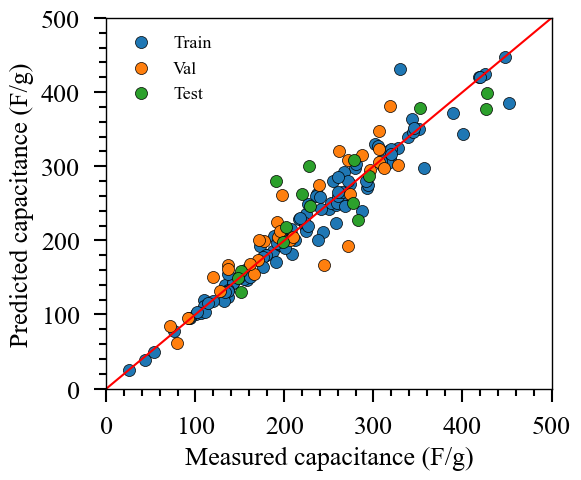

<Figure size 700x500 with 0 Axes>

In [228]:
train_predictions_transfer = TargetModel.predict(X_train_transfer).flatten()
val_predictions_transfer = TargetModel.predict(X_val_transfer).flatten()
test_predictions_transfer = TargetModel.predict(X_test_transfer).flatten()

plotter.plot_model_eval(
            predictions={'train': train_predictions_transfer, 'test': test_predictions_transfer, 'val': val_predictions_transfer},
                        labels={'train': y_train_transfer, 'test': y_test_transfer, 'val': y_val_transfer}, 
                        llimit=0, ulimit=500, fig_size=(6, 5),
                        name='TargetModel_eval', 
                        x_label='Measured capacitance (F/g)', 
                        y_label='Predicted capacitance (F/g)')

In [229]:
# accuracy
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Training set')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train_transfer, train_predictions_transfer)):0.2f}, R^2: {r2_score(y_train_transfer, train_predictions_transfer):0.2f}, MAE: {mean_absolute_error(y_train_transfer, train_predictions_transfer):0.2f}')
print('Validation set')
print(f'RMSE: {np.sqrt(mean_squared_error(y_val_transfer, val_predictions_transfer)):0.2f}, R^2: {r2_score(y_val_transfer, val_predictions_transfer):0.2f}, MAE: {mean_absolute_error(y_val_transfer, val_predictions_transfer):0.2f}')
print('Test set')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_transfer, test_predictions_transfer)):0.2f}, R^2: {r2_score(y_test_transfer, test_predictions_transfer):0.2f}, MAE: {mean_absolute_error(y_test_transfer, test_predictions_transfer):0.2f}')

Training set
RMSE: 21.14, R^2: 0.95, MAE: 12.29
Validation set
RMSE: 33.57, R^2: 0.82, MAE: 25.63
Test set
RMSE: 39.44, R^2: 0.75, MAE: 30.76


In [230]:
history_target_model = pd.DataFrame(TargetModel.history.history)

history_target_model.head()

""


In [231]:
TargetModel.save_weights(f'./models/specific_capacitance_target_model_ETR_imputation_approach.h5')